In [1]:
!pip install -r requirements.txt
!pip install git+https://github.com/sakoho81/pyimagequalityranking.git

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


  Cloning https://github.com/sakoho81/pyimagequalityranking.git to c:\users\mspat\appdata\local\temp\pip-req-build-d9szeb4z
  Resolved https://github.com/sakoho81/pyimagequalityranking.git to commit 094b0b9f79f7f78853a79d71be686f91491e0574
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/sakoho81/pyimagequalityranking.git 'C:\Users\mspat\AppData\Local\Temp\pip-req-build-d9szeb4z'


In [2]:
!pyimq.main --mode=directory --mode=analyze --mode=plot \
--working-directory=DAPI --normalize-power --result=fstd

Mode option is ['directory', 'analyze', 'plot']
Done analyzing Snapshot20230209_DMSO_DAPI_TIF.tif
Done analyzing Snapshot20230209_Val15_DAPI_TIF.tif
Done analyzing Snapshot20230209_Val30_DAPI_TIF.tif
The results were saved to DAPI\2023-02-09_PyIQ_output\18-43-45_PyIQ_out.csv
The results were saved to DAPI\2023-02-09_PyIQ_output\18-43-49_PyIQ_analyze_out.csv
DAPI\Snapshot20230209_DMSO_DAPI_TIF.tif
DAPI\Snapshot20230209_Val30_DAPI_TIF.tif
DAPI\Snapshot20230209_Val30_DAPI_TIF.tif
Figure(640x480)
DAPI\Snapshot20230209_DMSO_DAPI_TIF.tif
DAPI\Snapshot20230209_Val30_DAPI_TIF.tif
DAPI\Snapshot20230209_Val30_DAPI_TIF.tif
Figure(640x480)


In [3]:
import pandas as pd
import seaborn as sns

In [4]:
imaq_24h=pd.read_csv('DAPI/2023-02-09_PyIQ_output/18-43-49_PyIQ_analyze_out.csv')
imaq_24h.tail()

,Filename,tEntropy,tBrenner,fMoments,fMean,fSTD,fEntropy,fTh,fMaxPw,Skew,...,SpectMean,SpectSTDNorm,InvSpectSTDNorm,SpectEntNorm,SkewNorm,KurtosisNorm,SpectHighPowerNorm,MeanBinNorm,BrennerNorm,SpectMomentsNorm
0,DAPI\Snapshot20230209_DMSO_DAPI_TIF.tif,2.831123,7.374816e+10,39.518144,43565.783260,15435.811377,4.407279,2.384615e+09,32166.488742,1.244357,...,1.000000,1.000000,0.000000,0.979995,0.063087,0.893932,1.000000,1.000000,1.000000,0.872586
1,DAPI\Snapshot20230209_Val30_DAPI_TIF.tif,1.897857,4.586107e+10,45.288557,36892.338661,14916.820124,4.377870,2.407059e+09,25953.156533,1.230421,...,0.846819,0.966377,0.033623,0.973455,0.073579,1.000000,0.806838,0.929250,0.621861,1.000000
2,DAPI\Snapshot20230209_Val15_DAPI_TIF.tif,2.014531,5.092208e+10,39.478721,31639.676205,8274.495031,4.497248,2.346330e+09,25486.225608,1.328145,...,0.726251,0.536058,0.463942,1.000000,0.000000,0.867973,0.792322,0.613161,0.690486,0.871715


<AxesSubplot: xlabel='fSTD', ylabel='Count'>

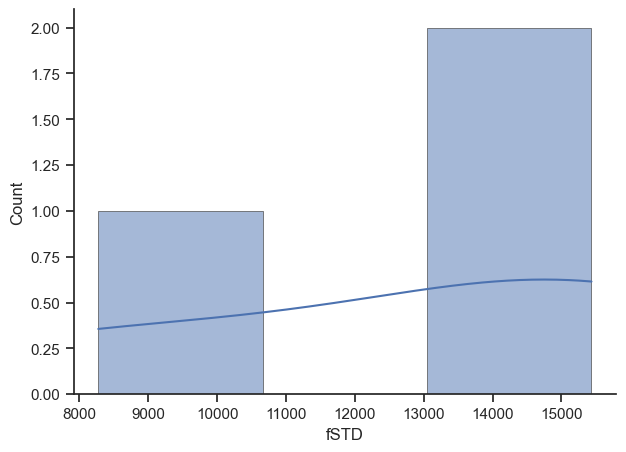

In [5]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    data=imaq_24h, 
    x="fSTD", 
    kde=True,
    edgecolor=".3",
    linewidth=.5,
)
# ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# ax.set_xticks([5, 10, 20, 30, 50, 100])

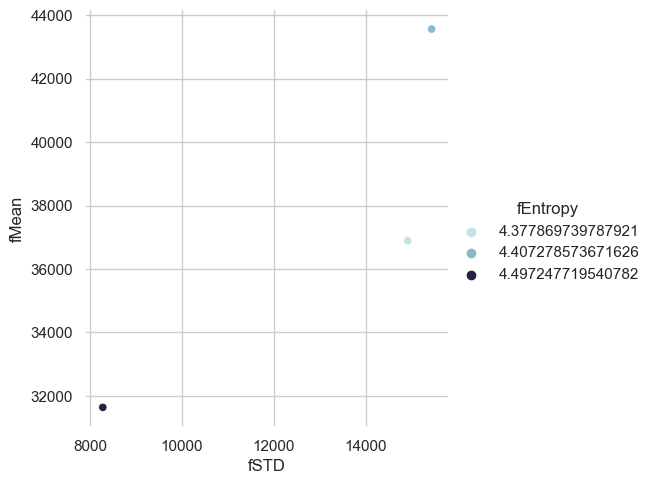

In [7]:
sns.set_theme(style="whitegrid")


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=imaq_24h,
    x="fSTD", y="fMean",
    hue="fEntropy",# size="fEntropy",
    palette=cmap, sizes=(10, 200),
)
# g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

In [10]:
imaq_24h_sel=imaq_24h[imaq_24h['fSTD']<3]

In [12]:
imaq_24h_sel.Filename.count()

31

In [15]:
imaq_24h_sel.to_csv('20230206_CHOK1_HeLa_24h_filterOut.csv', sep=";") 